In [1]:
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt

In [2]:
# Utils

# Importer une image
def import_image(filename):
    image = ski.io.imread(filename)
    return np.array(image)

# Afficher une image
def display_image(image, title):
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Calculer le PSNR entre deux images
def psnr(original_image, processed_image):
    original_image = original_image.astype(np.float64)
    processed_image = processed_image.astype(np.float64)
    mse = np.mean((original_image - processed_image) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr_value

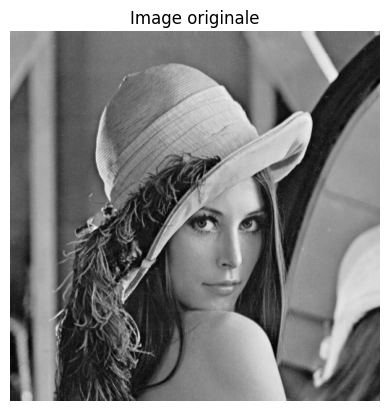

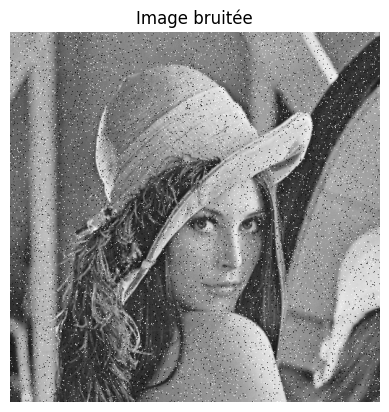

PSNR avec noyau 3x3 : 33.37775441462844
PSNR avec noyau 5x5 : 29.74834464232782
PSNR avec noyau 7x7 : 27.78817759580658
PSNR avec noyau 9x9 : 26.561838754452346
PSNR avec noyau 11x11 : 25.596032204128733


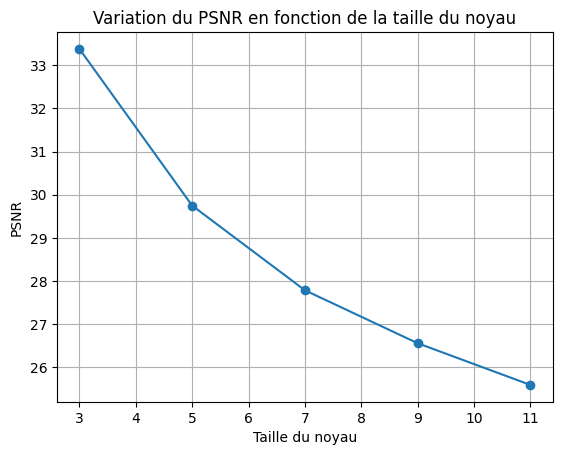

In [7]:

image = import_image("lena.pgm")
display_image(image, "Image originale")

image_noised = ski.util.random_noise(image, mode='s&p', amount=0.05) * 255
image_noised = image_noised.astype(np.uint8)
display_image(image_noised, 'Image bruitée')

ski.io.imsave("results/noised.pgm", image_noised)

kernel_sizes = [3, 5, 7, 9, 11]  # Différentes tailles de noyau
psnr_values = []

for window_size in kernel_sizes:
    offset = window_size // 2
    image_filtree = image_noised.copy()

    for i in range(offset, image_noised.shape[0] - offset):
        for j in range(offset, image_noised.shape[1] - offset):
            window = image_noised[i - offset:i + offset + 1, j - offset:j + offset + 1]
            median_value = np.median(window)
            image_filtree[i, j] = median_value

    psnr_val = psnr(image, image_filtree)
    psnr_values.append(psnr_val)
    print(f"PSNR avec noyau {window_size}x{window_size} : {psnr_val}")

    ski.io.imsave(f"results/denoised_{window_size}.pgm", image_filtree)

plt.figure()
plt.plot(kernel_sizes, psnr_values, marker='o')
plt.xlabel("Taille du noyau")
plt.ylabel("PSNR")
plt.title("Variation du PSNR en fonction de la taille du noyau")
plt.grid()
plt.show()
